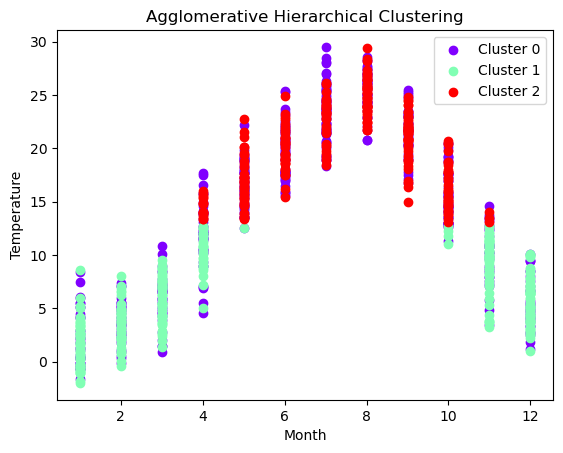

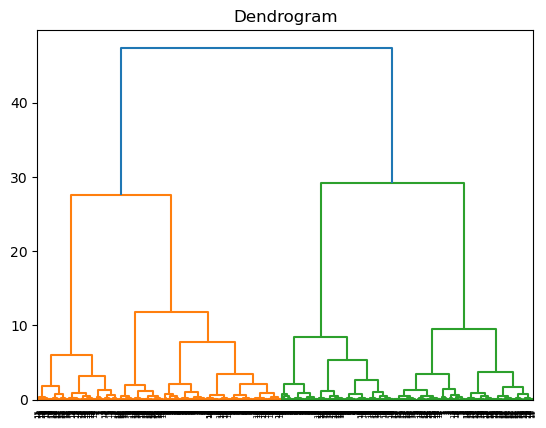

Cluster 0:
      Month  Temperature  Windy
1         1          2.9      0
2         1          2.3      0
3         1          3.0      0
5         1          2.1      0
9         1         -0.4      0
...     ...          ...    ...
1078     12          4.2      0
1085     12          5.5      0
1089     12          7.1      0
1091     12          6.6      0
1094     12          1.8      0

[539 rows x 3 columns]
Cluster 1:
      Month  Temperature  Windy
0         1          3.3      1
4         1          3.1      1
6         1          1.2      1
7         1         -0.2      1
8         1         -0.6      1
...     ...          ...    ...
1087     12          7.2      1
1088     12          7.7      1
1090     12          7.1      1
1092     12          6.3      1
1093     12          4.3      1

[309 rows x 3 columns]
Cluster 2:
      Month  Temperature  Windy
94        4         13.4      1
109       4         13.7      1
111       4         14.0      1
118       4         14.

In [22]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your golf dataset into a pandas DataFrame
data = pd.read_csv("golf_dataset_wide_format.csv")

# Select the columns 'Month', 'Crowdedness', and 'Windy' for clustering
selected_columns = ['Month', 'Temperature', 'Windy']
subset_data = data[selected_columns]

# Standardize the data (important for clustering)
scaler = StandardScaler()
subset_data_scaled = scaler.fit_transform(subset_data.drop(columns=['Month']))

# Apply Agglomerative Hierarchical Clustering
n_clusters = 3  # You can adjust the number of clusters as needed
clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(subset_data_scaled)

# Create the linkage matrix for the dendrogram
linkage_matrix = linkage(subset_data_scaled, method='ward')

# Add the cluster labels to the original DataFrame
data['Cluster_Label'] = clustering.labels_

# Define unique cluster labels and corresponding colors
unique_labels = np.unique(clustering.labels_)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Visualize the clusters
for cluster_label, color in zip(unique_labels, colors):
    cluster_data = data[data['Cluster_Label'] == cluster_label]
    plt.scatter(cluster_data['Month'], cluster_data['Temperature'], label=f'Cluster {cluster_label}', color=color)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Agglomerative Hierarchical Clustering')

# Add a legend
plt.legend()

plt.show()

# Create and display the dendrogram
dendrogram(linkage_matrix, orientation='top', labels=data['Month'].tolist())
plt.title('Dendrogram')
plt.show()

# Print the cluster assignments
for cluster_num in range(n_clusters):
    cluster_data = data[data['Cluster_Label'] == cluster_num]
    print(f"Cluster {cluster_num}:\n{cluster_data[['Month', 'Temperature', 'Windy']]}")

